In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv("/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/Decision Tree & Naive Bayes Classification/pima-indians-diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [39]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [40]:
print(X_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

In [42]:
dlf = DecisionTreeClassifier()
dlf.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
ypred = dlf.predict(x_test)

In [44]:
dlf.predict([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

array([1])

In [45]:
accuracy = accuracy_score(y_test, ypred)
conf = confusion_matrix(y_test, ypred)
summary = classification_report(y_test, ypred)

print('Accuracy:', accuracy*100, "%" )
print("Confusion Matrix:",conf)
print("Summary: ", summary)

Accuracy: 74.02597402597402 %
Confusion Matrix: [[76 23]
 [17 38]]
Summary:                precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



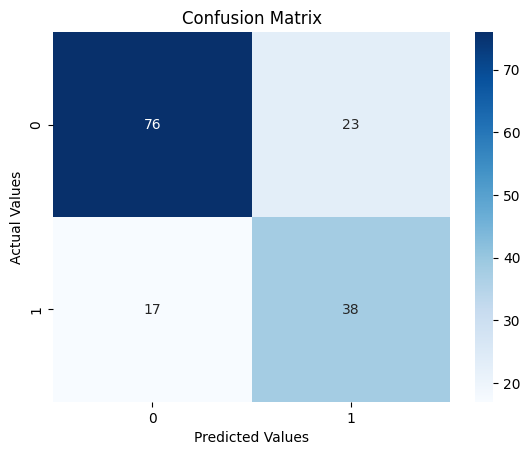

In [46]:
sns.heatmap(conf, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
xlabel = plt.xlabel("Predicted Values")
ylabel = plt.ylabel("Actual Values")
plt.show()


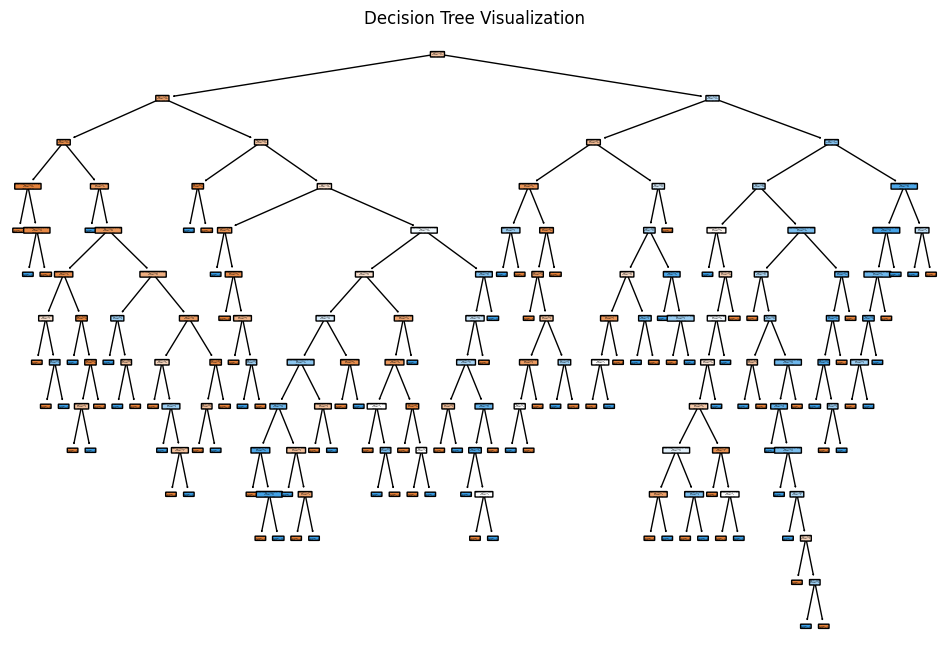

In [53]:
plt.figure(figsize=(12, 8))
plot_tree(dlf, feature_names= ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness'	,'Insulin',	'BMI'	,'DiabetesPedigreeFunction','Age'],filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()